# Prototipagem sistêmica (modelagem de um sistema multiusuário multicelular, cálculo de interferência e SINR) 

## Modulação de múltiplas portadoras e OFDM
Um dos elementos-chave do sistema LTE é o uso do OFDM (Orthogonal Frequency Division Multiplex) e dos esquemas de acesso associados, OFDMA (Orthogonal Frequency Division Multiple Access) e SC-FDMA (Single Frequency Division Multiple Access). Afinal, o OFDM possui muitas vantagens, incluindo a sua robustez ao multi-percurso e à interferência. 

Dadas as suas vantagens, o uso de OFDM, OFDMA e SC-FDMA são escolhas naturais para o novo padrão celular LTE. Neste Hands-on, entenderemos melhor o funcionamento do OFDM, compreendendo e analisando suas vantagens e desvantagens.

### Divisão na frequência e ortogonalidade
Em modulações de múltiplas portadoras, a largura de banda disponível é subdividida em um número de subcanais (ou subportadoras) de mesma largura de banda, como visto abaixo:

![Figura01](./handsOn13_matlab_figs/Figura_1.png)

A quantidade de subcanais é dada por $K = W/\Delta f$, onde $W$ é a largura de banda total e $\Delta f$ é a separação entre subportadoras adjacentes. Assim, símbolos de informação diferentes são transmitidos simultaneamente e de forma síncrona nos $K$ subcanais. Os dados aqui (mostrados na Figura 1) são transmitidos por multiplexação por divisão de frequência (FDM).

Para cada subcanal, associaremos uma portadora:
$$ x_{k}(t)=sen(2\pi f_{k} t) $$ 
Sendo $k=0,1,...,K-1$ e $f_{k}$ a frequência central do canal $k$. Escolhendo uma taxa de símbolo $1/T$ em cada um dos subcanais igual a $\Delta f $, demostra-se que:

$$ \int_{0}^{T}sen(2 \pi f_{k} t + \varphi_{k}) \cdot sen(2 \pi f_{j} t + \varphi_{j}) = 0 $$ 

Onde $\left (f_{k} − f_{j}\right ) = \frac {n}{T}$ , com $n$ variando de $ n = 1,2, ... $. E essa relação é verdadeira para quaisquer $\varphi _{k}$ e $\varphi _{j}$ . Ou seja, as subportadoras são ortogonais na duração de símbolo $T$, independentemente da fase entre as duas subportadoras.
Com essa restrição, a multiplexação se torna por Divisão Ortogonal de Frequência(OFDM). 

O sistema OFDM é utilizado para evitar os efeitos da interferência inter simbólica que se encontram muito presentes em sistemas de portadora única. As subportadoras são arranjadas de tal forma que no centro de suas frequências se tenha um nulo, como mostra a Figura.

![Figura02](./handsOn13_matlab_figs/Figura_2.png)

Se $T_{s}$ é o intervalo de símbolo em um sistema de portadora única, o intervalo de símbolo em um sistema OFDM de $k$ subcanais é $T = K \cdot T_{s}$. Na figura abaixo, vemos um caso no qual o primeiro símbolo chega um pouco atrasado, fazendo com que sua parte final ultrapasse o seu tempo e ocupe o tempo do próximo símbolo. Essa interferência entre símbolos diferentes é chamada “Interferência Inter Simbólica (ISI) ”.



![Figura03](./handsOn13_matlab_figs/Figura_3.png)



Escolhendo um $K$ suficientemente grande, o intervalo de símbolo $T$ no sistema OFDM pode ser muito maior que o tempo de dispersão do canal, ou seja, que o atraso do símbolo, fazendo com que não haja $ISI$.

### Exemplo 1 --  Matlab

Sendo duas subportadoras em um sinal OFDM: 

$$ x_{k}(t)=sen(2\pi f_{k} t + \phi_{k} ) $$

$$ x_{j}(t)=sen(2\pi f_{j} t + \phi_{j} ) $$


Para $0 \leq t \leq T$

Considerando $f_{k} = 2 Hz$ e $f_{j} = f_{k} + n/T $, onde $ n = 1, 2, 3$, e as fases $\phi_{k}$ e $\phi_{j}$ são
arbitrárias variando de $ [0,2\pi]$. Demonstre a propriedade da ortogonalidade usando os sinais amostrados $x_{k}(mT_{s})$  e $x_{j}(mT_{s})$, onde $T_{s} = 1/5$ s, $T = 10 $s , $M = \frac{T}{T_{s}} = 50$ é o número de subcanais e  $m = 0,1,2, ... , M − 1 = 0,1,2, ... , 49 $.

--> **Solução:**



--- Passo 1)

Inicialmente, definiremos as variáveis $M$ e $ n$, além de $\phi_{k}$ e $\phi_{j}$. A função $rand()$ gera um número aleatório entre 0 e 1.

In [1]:
clc;clear all;close all;
%% Parâmetros dados na questão 
% Passo 1)
M = 50;                                     % Número de subcanais
m = 0:M-1;                                  % Vetor índice de canal
phi_k = 2*pi*rand;                          % Fase aleatória do sinal k
phi_j = 2*pi*rand;                          % Fase aleatória do sinal j

--- Passo 2)

Obtemos os sinais amostrados:

$$  x_{k}\left ( mT_{s}\right ) = sen \left ( 2\pi f_{k} \left ( mT_{s} \right ) +\phi_{k} \right )  =  sen \left ( 4\pi \left ( mT_{s} \right ) +\phi_{k} \right )  = sen \left ( \frac{4\pi m}{5}+\phi_{k} \right )  $$
Já o $x_{j}$ é dito como:

$$ x_{j}\left ( mT_{s} \right ) =  sen \left ( 2\pi \cdot \left ( f_{k}+n/T\right )   \cdot \left ( mT_{s}\right ) +\phi_{j}\right )   = sen\left ( 2\pi \cdot f_{k}  \cdot mT_{s} +2\pi \cdot   mn\cdot \left ( T_{s}/T \right ) +\phi_{j}\right )  $$

$$  x_{j}\left ( mT_{s} \right ) =sen \left ( \frac{4\pi m} { 5} +\frac{ 2\pi mn}{50}+ \phi_{j}\right )  $$


Sendo $n=1,2,3$

In [2]:
%% Sinais amostrados 
% Passo 2)
x_k = sin(4*pi*m/5+phi_k);                  
n = 1;                                      
x_j_1 = sin(4*pi*m/5+2*pi*m*n/M+phi_j);
n = 2;
x_j_2 = sin(4*pi*m/5+2*pi*m*n/M+phi_j);
n = 3;
x_j_3 = sin(4*pi*m/5+2*pi*m*n/M+phi_j);

--- Passo 3)

Para demostrar a ortogonalidade devemos ter, para sinais contínuos:

$$ \int_{0}^{T} \left (sen(2\pi f_{k}t+\phi_{k}) \cdot sen(2\pi f_{j}t+\phi_{j})\right ) dt = 0$$

Ou, para sinais discretos (amostrados):

$$ \sum_{m=0}^{49}x_{k}(mT_{s})\cdot x_{j}(mT_{s}) $$

Calculando no Matlab os três somatórios, para cada valor de n:

In [ ]:
%% Verificar ortogonalidade  
% Passo 3)
Sum1 = sum(x_k.*x_j_1);
disp(['O resultado para n=1 é: ' , num2str(Sum1)])
Sum2 = sum(x_k.*x_j_2);
disp(['O resultado para n=2 é: ' , num2str(Sum2)])
Sum3 = sum(x_k.*x_j_3);
disp(['O resultado para n=3 é: ' , num2str(Sum3)])

Juntando os três passos, chegamos ao seguinte:

In [4]:
clc;clear all;close all;
%% Parâmetros dados na questão 
% Passo 1)
M = 50;
m = 0:M-1;
phi_k = 2*pi*rand;
phi_j = 2*pi*rand; 

%% Sinais amostrados 
% Passo 2)
x_k = sin(4*pi*m/5+phi_k);
n = 1;
x_j_1 = sin(4*pi*m/5+2*pi*m*n/M+phi_j);
n = 2;
x_j_2 = sin(4*pi*m/5+2*pi*m*n/M+phi_j);
n = 3;
x_j_3 = sin(4*pi*m/5+2*pi*m*n/M+phi_j);

%% Verificar ortogonalidade  
% Passo 3)
Sum1 = sum(x_k.*x_j_1);
disp(['O resultado para n=1 é: ' , num2str(Sum1)])
Sum2 = sum(x_k.*x_j_2);
disp(['O resultado para n=2 é: ' , num2str(Sum2)])
Sum3 = sum(x_k.*x_j_3);
disp(['O resultado para n=3 é: ' , num2str(Sum3)])

O resultado para n=1 é: -7.2858e-15
O resultado para n=2 é: -4.4464e-14
O resultado para n=3 é: -2.1705e-14


Esses valores são muito próximo de zero, de modo que dessa forma comprovamos a ortogonalidade entre as subportadoras $x_{k}(t)$ e $x_{j}(t)$ para quaisquer valores de $\phi_{k}$ e $\phi_{j}$ .

## Transmissão de um sinal OFDM

Um esquema simplificado do transmissor $OFDM$ é mostrado na figura:

![Figura04](./handsOn13_matlab_figs/Figura_4.png)

No sistema LTE, a modulação pode ser do tipo QPSK (Quadrature Phase Shift Keying),16-QAM ou 64-QAM (Quadrature Amplitude Modulation).

A modulação M-QAM é combinada pela modulação em fase e amplitude do sinal, que usa com maior eficiência a largura de faixa. Esse tipo de modulação é constituído de $M$ símbolos, cada qual representado por $k = log_{2}(M)$ bits.

Neste hands-on, utilizaremos o $OFDM$ com $ 16-QAM$. Ou seja, existirão $16$ símbolos, cada um com uma respectiva amplitude e fase, representando uma sequência de $ 4 $ bits. Um exemplo de constelação $16-QAM$ pode ser observado na Figura $5$ e ter sua correspondência de valores binários e complexos analisada na tabela abaixo. Entretanto, é importante enfatizar que podemos representar a sequência de $4 $ bits com fases e amplitudes diferentes das mostradas na figura e tabela. Ou seja, aqui estamos representando a sequência $1010 $ como $1 + 1j$, mas pode existir outra constelação em que essa mesma sequência seja representada por $ 3 − 3j$, por exemplo.

Tabela 1: Correspondência entre os símbolos 16-QAM e os valores binários e decimais

![Figura05](./handsOn13_matlab_figs/Figura_5.png)

| Número em decimal |   Número em binário        | Número complexo correspondente à constelação 16-QAM ($X_{k}$)|
|:------:|:-------------:|:-----:|
|0 |0000|-3-3j|
|1 |0001|-3-1j|
|2 |0010|-3+1j|
|3 |0011|-3+3j|
|4 |0100|-1-3j|
|5 |0101|-1-1j|
|6 |0110|-1+1j|
|7 |0111|-1+3j|
|8 |1000|1-3j |
|9 |1001|1-1j |
|10|1010|1+1j |
|11|1011|1+3j |
|12|1100|3-3j |
|13|1101|3-1j |
|14|1110|3+1j |
|15|1111|3+3j |





Um modulador $OFDM$ gera $K$ subportadoras independentes, onde cada subportadora é modulada por símbolos a partir de uma constelação $QAM$, obtendo um valor complexo. 

Dessa forma, cada ponto de valor complexo corresponde à informação de uma respectiva subportadora $X_{k}$ , sendo $k=0, 1, ... K-1$. Assim, esses símbolos de informação $X_{k}$ representam os valores de uma DFT de um sinal OFDM de múltiplas portadoras, onde a modulação de cada portadora é QAM. Essa DFT deve obedecer à simetria $ X_{N−k} = X_{k}^{*} $, sendo $X_{k}^{*}$ o conjugado de $X_{k}$. Para fazer isso, basta concatenar o vetor $X_{k}$ com $X_{k}^{*}$ na ordem inversa (vide Exemplo 2 Matlab,abaixo). Dessa forma, cria-se, a partir de $K$ símbolos de informação, uma sequência de $N=2K$
símbolos, a qual chamaremos de $X_{k}^{'}$.
Com isso, realizamos a transformada inversa discreta de Fourier (IDFT) de $X_{k}^{'}$ , obtendo o sinal $x_{n}$ :
$$x_{n}= \frac{1}{\sqrt{N}}    \sum_{k=0}^{N-1}X_{k}^{'} e^{j2\pi n \frac{k}{N} }$$

Sendo $n=1, 2, ..., N-1 $ e $1/ \sqrt{N}$ simplesmente um fator de escala. O sinal $x_{n}$ representa as amostras do sinal OFDM $x(t)$ de múltiplas portadoras. Sendo    $ x_{n} = x\left ( \frac{nT}{N}   \right) $, $x(t)$ pode ser representado por:


$$x_{n}= \frac{1}{\sqrt{N}}    \sum_{k=0}^{N-1}X_{k}^{'} e^{j2\pi n \frac{kt}{T} }$$
Para $0\leq t \leq T$, sendo $T$ a duração/intervalo do sinal.


### Exemplo 2 Matlab

Gere um sinal OFDM $x(t)$ com $200$ bits pseudoaleatórios, modulação 16-QAM, $T=100$ segundos e $T_{s} =2 $ segundos. Plote a forma de onda de $x(t)$ e, em seguida, compute os valores de $x_{n}$, mostrando graficamente que $ x_{n} = x\left ( \frac{nT}{N}   \right) $.



--> ** Solução: **


Inicialmente, vamos declarar as principais variáveis. Temos que o número de bits  $ n_{bits}=200$, que o tempo de símbolo OFDM $T = 100$ segundos e que o tempo de símbolo de portadora única $ T_{S} =2$ segundos. Com isso, podemos calcular o número de subportadoras (K), dada pela relação entre $T$ e $T_{S}$ e do número de pontos da DFT ($N=2K$).

In [ ]:
clc;clear all;close all;
%% Parâmetros 
n_bits = 200;                               % Numero de bits
T = 100;                                    % Tempo de símbolo OFDM
Ts = 2;                                     % Tempo de símbolo em portadora unica
K = T/Ts;                                   % Numero de subportadoras independentes 
N = 2*K;                                    % DFT de N pontos

Temos, então, $50$ subportadoras e $100$ pontos de DFT.

Em seguida, iremos gerar os $200$ bits pseudoaleatórios utilizando a função $rand()$. Essa função gera números entre $0$ e $1$ a partir de uma distribuição uniforme, de modo que há igual probabilidade de gerar números maiores que $0,5$ e menores que $0,5$. Subtraindo esse sinal de $0,5$, obteremos, então, valores uniformemente distribuídos entre $-0,5$ e $ 0,5$ . A função $sign()$ substituirá os valores negativos por $-1$ e valores positivos por $1$. Por fim, organizaremos essa sequência, que antes estava em um vetor de uma linha e n_bits colunas, em uma matriz de
quatro colunas e n_bits/4 linhas utilizando a função $reshape()$.



In [ ]:
%% Gerar bits aleatorios
dataIn=rand(1,n_bits);                      % Sequência de numeros entre 0 e 1 uniformemente distribuidos
dataIn=sign(dataIn-.5);                     % Sequência de -1 e 1
dataInMatrix = reshape(dataIn,n_bits/4,4);  % Conversor serial paralelo


Para mais informações, consulte:

In [5]:
help reshape

reshape - Reshape array

    This MATLAB function reshapes A using the size vector, sz, to define size(B).

    B = reshape(A,sz)
    B = reshape(A,sz1,...,szN)

    See also colon (:), permute, repmat, shiftdim, squeeze

    Other uses of reshape
        control/reshape, fixedpoint/reshape, symbolic/reshape



Com os bits devidamente organizados, podemos então gerar a constelação 16-QAM. Faremos isso de modo que os dois primeiros bits representem a parte real da constelação e os dois últimos a parte imaginária, ou seja, respeitando a constelação mostrada na Figura 5 e Tabela 1. Obteremos assim a variável $seq16qam$.

Para calcular$X_{k}^{′}$ e obtê-lo como um vetor de uma linha e $N$ colunas, calculamos a transposta de seq16qam e, para manter a propriedade da simetria da DFT, concatenamos seq16 com seu conjugado na ordem inversa.



In [ ]:
%% Gerar constelaçao 16-QAM
seq16qam = 2*dataInMatrix(:,1) + dataInMatrix(:,2) + 1i*(2*dataInMatrix(:,3)+ dataInMatrix(:,4)); %simbolos 16-QAM
seq16=seq16qam';                            % Transposta de seq16qam
X = [seq16 (seq16(end:-1:1))];              % Para propriedadade da simetria

Os valores de $X$ serão usados para calcular o sinal analógico a ser transmitido, $x(t)$, e a sua versão amostrada, $x_{n}$ . Perceba que o tamanho do vetor $X$ é o dobro do tamanho de seq16 e que os tamanhos de seq16 e de $X$ são iguais a $K$ e $N$, respectivamente.
Já mostramos que a transformada inversa discreta de Fourier (IDFT) de $X_{k}^{'}$ , é:


$$x_{n}= \frac{1}{\sqrt{N}}    \sum_{k=0}^{N-1}X_{k}^{'} e^{j2\pi n \frac{k}{N} }$$

Dessa forma, podemos gerar o sinal discreto $x_{n}$:

In [ ]:
%% Construindo xn
xn = zeros(1,N);
for n=0:N-1
for k=0:N-1
xn(n+1) = xn(n+1) + 1/sqrt(N)*X(k+1)*exp(1i*2*pi*n*k/N);
end
end


Como visto na Figura 4, o sinal a ser enviado é um sinal analógico e contínuo x(t), obtido a partir da seguinte equação, já vista anteriormente:

$$x(t) 
= \frac{1}{\sqrt{N}}    \sum_{k=0}^{N-1}X_{k}^{'} e^{j2\pi n \frac{kt}{T} }$$

Com $ 0\leq t \leq T$, sendo $T$ a duração $/$ intervalo do sinal, construímos $x(t)$.

In [ ]:
%% Construindo xt
xt=zeros(1, T+1);
for t=0:100
for k=0:N-1
xt(1,t+1)=xt(1,t+1)+1/sqrt(N)*X(k+1)*exp(1i*2*pi*k*t/T);
end
end

Sendo $ x(t) $ um sinal representado no tempo composto de todas as subportadoras. Para observar o comportamento de sua envoltória, realizaremos o plot de seu módulo utilizando a função $abs()$ como mostrado abaixo:

In [ ]:
%% Plotting
plot(abs(xt));
title('Envoltoria de x(t)')
xlabel('Tempo')
ylabel('x(t)')

O código final é resultado de todas as etapas realizadas, e fica da seguinte forma:

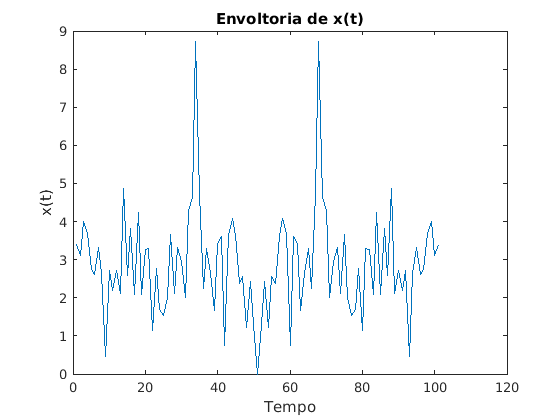

In [10]:
clc;clear all;close all;
%% Parâmetros 
n_bits = 200;                               % Numero de bits
T = 100;                                    % Tempo de símbolo OFDM
Ts = 2;                                     % Tempo de símbolo em portadora unica
K = T/Ts;                                   % Numero de subportadoras independentes 
N = 2*K;                                    % DFT de N pontos

%% Gerar bits aleatorios
dataIn=rand(1,n_bits);                      % Sequência de numeros entre 0 e 1 uniformemente distribuidos
dataIn=sign(dataIn-.5);                     % Sequência de -1 e 1
dataInMatrix = reshape(dataIn,n_bits/4,4);  % Conversor serial paralelo

%% Gerar constelaçao 16-QAM
seq16qam = 2*dataInMatrix(:,1) + dataInMatrix(:,2) + 1i*(2*dataInMatrix(:,3)+ dataInMatrix(:,4)); %simbolos 16-QAM
seq16=seq16qam';
X = [seq16 (seq16(end:-1:1))]; %Para propriedadade da simetria

%% Construindo xn
xn = zeros(1,N);
for n=0:N-1
for k=0:N-1
xn(n+1) = xn(n+1) + 1/sqrt(N)*X(k+1)*exp(1i*2*pi*n*k/N);
end
end

%% Construindo xt
xt=zeros(1, T+1);
for t=0:100
for k=0:N-1
xt(1,t+1)=xt(1,t+1)+1/sqrt(N)*X(k+1)*exp(1i*2*pi*k*t/T);
end
end
plot(abs(xt));
title('Envoltoria de x(t)')
xlabel('Tempo')
ylabel('x(t)')

Com a figura acima, podemos observar um grande defeito da modulação de múltiplas portadoras: o alto **Peak-to-Average-Power-Ratio** (PAPR) ou seja, a alta relação entre o valor de potência máximo e a média. Altos picos no sinal podem saturar os amplificadores de potência no transmissor, causando distorção de intermodulação no sinal transmitido. No caso dos sistemas LTE, esse é um dos motivos pelos quais o OFDM não é utilizado no uplink, pois o alto PAPR encarece os amplificadores e obriga que eles possuam baixa eficiência de energia, por não poderem apresentar alto ganho, procura-se reduzir a complexidade do equipamento móvel.

Em seguida, devemos mostrar que $x_{n} = x\left ( \frac{nT}{N} \right )$, ou seja, que $x_{n}$ é o sinal amostrado de $x(t)$. Para isso, vamos simplesmente plotar o sinal discreto $x_{n}$ utilizando a função steam, sobrepondo-o ao sinal $x(t)$, utilizando o trecho de código abaixo e obtendo o gráfico mostrado na Figura 7.

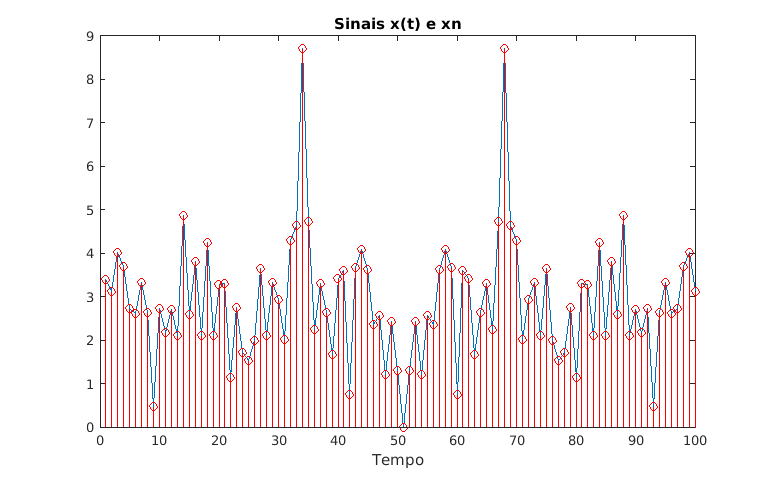

In [12]:
plot(abs(xt));
hold on
stem(abs(xn), 'r')
hold off
title('Sinais x(t) e xn')
xlabel('Tempo')
axis([0 100 0 9])
fig = gcf; fig.PaperPosition=[0 0 8 5];         % Configuração do recorte da folha


Como podemos observar, o sinal $x_{n}$ representa bem o sinal $x(t)$, e podemos afirmar que $x_{n} = x\left (\frac{nT}{N} \right )$.


## Recepção OFDM

Um esquema simplificado do receptor OFDM é mostrado na Figura 8.


![Figura06](./handsOn13_matlab_figs/Figura_6.png)

O primeiro bloco, mostrado como um conversor A $\rightarrow $D (analógico-digital) é simplesmente a amostragem do sinal $x(t) $ que chega ao receptor, obtemos com isso o sinal amostrado $x_{n}$. O segundo bloco é a transformada discreta de Fourier (DFT), que faremos com $x_{n}$ para obtermos $X_{k}$, ou seja, os símbolos representados por pontos na constelação 16-QAM. A DFT é dada por:

$$ X_{k} = \sum_{j=1}^{N} x(j) \cdot  \omega_{N}^{(j-1)(K-1)}$$

Onde $k=0, 1, ..., N-1$.

Entretanto, como veremos no Exemplo 3 de Matlab, esses pontos $X_{k}$ obtidos podem não ser exatamente aqueles valores pré-determinados na Tabela 1. Isso ocorre devido ao ruído acrescentado ao sinal durante sua passagem pelo canal. Será, então, realizada uma decisão sobre qual é o símbolo que $X_{k}$ representa. Faremos isso a partir da proximidade de $X_{ k}$ com a constelação 16-QAM.


Por exemplo, caso $X_{1}= 1,5 + j1,5$, ele será interpretado por 1 + j1, que é o valor da constelação 16-QAM mais próximo, como podemos ver na Figura 9, onde a constelação 16-QAM é representada por pontos azuis e o valor suposto de $X_{1}$ é representado por uma cruz vermelha. Por fim, concluímos que $X_{1}$ representa a sequência de bits $1010$. 






![Figura07](./handsOn13_matlab_figs/Constelacao16QAM.png)





--> **Exemplo 3 Matlab**
Considere o mesmo sinal gerado da situação do Exemplo 2, mas supondo que o sinal enviado foi corrompido por um ruído aditivo gaussiano branco (AWGN) de média zero e variância $\sigma=2$ (a ser escolhida pelo usuário). O sinal recebido amostrado $r_{n}$ será, então:
$$r_{n} = x_{n} + ruido$$


Calcule os valores de $r_{n}$, sua DFT $Y_{k}$, plotando $Y_{k}$ e os valores da constelação 16-QAM. Então estime os valores dos símbolos recebidos $Z_{k}$ e contabilize quantos símbolos foram recebidos erroneamente. Utilize $\sigma =\left \{ 2, 0.5, 1 \right \}$
- Solução:

Inicialmente, vamos criar um novo script e definir as variáveis, de forma parecida com a que fizemos no Exemplo 2. A única diferença será o acréscimo da variância do ruído, que será adicionado pelo usuário

In [ ]:
n_bits = 200;
% Numero de bits
T = 100;
% Tempo de símbolo OFDM
Ts = 2;
% Tempo de símbolo em portadora unica
K = T/Ts;
% Numero de subportadoras independentes
N = 2*K;
% DFT de N pontos
variance=input('Forneca o valor da variancia: '); % variância do ruido

Em seguida, vamos gerar os $200$ bits aleatórios, a constelação 16-QAM e o sinal $x_{n}$ , da mesma forma que fizemos no Exemplo 2.

In [ ]:
%Gerar bits aleatorios
dataIn=rand(1,n_bits); %sequencia de numeros entre 0 e 1 uniformemente distribuidos
dataIn=sign(dataIn-.5); %sequência de -1 e 1
dataInMatrix = reshape(dataIn,n_bits/4,4);
% Conversor serial paralelo
% Gerar constelaçao 16-QAM
seq16qam = 2*dataInMatrix(:,1) + dataInMatrix(:,2) + 1i*(2*dataInMatrix(:,3)+ dataInMatrix(:,4)); %simbolos 16-QAM
seq16=seq16qam';
X = [seq16 conj(seq16(end:-1:1))]; %Para propriedadade da simetria
% Construindo xn
xn = zeros(1,N);
for n=0:N-1
for k=0:N-1
xn(n+1) = xn(n+1) + 1/sqrt(N)*X(k+1)*exp(1i*2*pi*n*k/N);
end
end

Após isso, iremos gerar o ruído AWGN, que possui influência no eixo imaginário e real, isto é, influencia na amplitude e na fase do sinal. Utilizando a raiz da variância (desvio padrão), geraremos o ruído e vamos acrescentá-lo ao sinal $x_{n}$, obtendo o sinal recebido $r_{n}$.

In [ ]:
%Adição de ruido
noise = sqrt(variance)*randn(1,N)+1i*sqrt(variance)*randn(1,N);
%sinal recebido = xn+ruido
rn = xn+noise;

Com o sinal recebido amostrado $r_{n}$ , vamos calcular sua DFT, obtendo $Y_{k}$, da seguinte maneira:


$$ Y_{k} = \frac{1}{\sqrt{N}} \cdot \sum_{n=0}^{N-1} r_{n} e^{-j2\pi k \frac{n}{N}}$$



In [ ]:
Y = zeros(1,K); %prealocação de Y
%DFT de rn
for k=0:K-1
for n=0:N-1
Y(1,k+1) = Y(1,k+1) + 1/sqrt(N)*rn(n+1)*exp(-1i*2*pi*k*n/N);
end
end

Com isso, já podemos plotar $Y_{k}$ e os valores da constelação 16-QAM utilizando as funções scatterplot e scatter.

In [ ]:
scatterplot(Y)
hold on
scatter(real(seq16),imag(seq16), 'r', '+')
hold off
title(['Sinal com ruido de variancia ', num2str(variance)])

Os gráficos obtidos para diferentes variâncias são mostrados na Figura 10. O sinal enviado, $seq16$, é representado com cruzes vermelhas e o sinal $Y_{k}$ com círculos azuis.

In [ ]:
clc;clear all;close all;
%% Parâmetros
n_bits = 200;                                       % Numero de bits
T = 100;                                            % Tempo de símbolo OFDM
Ts = 2;                                             % Tempo de símbolo em portadora unica
K = T/Ts;                                           % Numero de subportadoras independentes
N = 2*K;                                            % DFT de N pontos
variance=input('Forneca o valor da variancia: ');   % Variância do ruido

%% Gerar bits aleatorios
dataIn=rand(1,n_bits);                              % Sequência de números entre 0 e 1 uniformemente distribuidos
dataIn=sign(dataIn-.5);                             % Sequência de -1 e 1
dataInMatrix = reshape(dataIn,n_bits/4,4);          % Conversor serial paralelo

%% Gerar constelaçao 16-QAM
seq16qam = 2*dataInMatrix(:,1) + dataInMatrix(:,2) + 1i*(2*dataInMatrix(:,3)+ dataInMatrix(:,4)); % Símbolos 16-QAM
seq16=seq16qam';
X = [seq16 conj(seq16(end:-1:1))];                  % Para propriedadade da simetria

%% Construindo xn
xn = zeros(1,N);
for n=0:N-1
for k=0:N-1
xn(n+1) = xn(n+1) + 1/sqrt(N)*X(k+1)*exp(1i*2*pi*n*k/N);
end
end

%% Adição de ruido
noise = sqrt(variance)*randn(1,N)+1i*sqrt(variance)*randn(1,N); % Adcionando Ruido
rn = xn+noise;% sinal recebido = xn+ruido

%% Cálculo da DFT
Y = zeros(1,K); %prealocação de Y
%DFT de rn
for k=0:K-1
for n=0:N-1
Y(1,k+1) = Y(1,k+1) + 1/sqrt(N)*rn(n+1)*exp(-1i*2*pi*k*n/N);
end
end

%% Plotting
scatterplot(Y)
hold on
scatter(real(seq16),imag(seq16), 'r', '+')
hold off
title(['Sinal com ruido de variancia ', num2str(variance)])